In [12]:
from urllib.request import urlopen
import json

In [17]:
contents = urlopen("http://s3-us-west-2.amazonaws.com/usgs-lidar-public/IL_BooneCo_2007/ept.json").read()

In [29]:
json.loads(contents.decode('utf-8'))

{'bounds': [-9619663, 5187948, 320, -9618817, 5188794, 1166],
 'boundsConforming': [-9619660, 5187949, 687, -9618820, 5188793, 798],
 'dataType': 'laszip',
 'hierarchyType': 'json',
 'points': 828681,
 'schema': [{'name': 'X',
   'offset': -9619240,
   'scale': 0.01,
   'size': 4,
   'type': 'signed'},
  {'name': 'Y', 'offset': 5188371, 'scale': 0.01, 'size': 4, 'type': 'signed'},
  {'name': 'Z', 'offset': 743, 'scale': 0.01, 'size': 4, 'type': 'signed'},
  {'name': 'Intensity', 'size': 2, 'type': 'unsigned'},
  {'name': 'ReturnNumber', 'size': 1, 'type': 'unsigned'},
  {'name': 'NumberOfReturns', 'size': 1, 'type': 'unsigned'},
  {'name': 'ScanDirectionFlag', 'size': 1, 'type': 'unsigned'},
  {'name': 'EdgeOfFlightLine', 'size': 1, 'type': 'unsigned'},
  {'name': 'Classification', 'size': 1, 'type': 'unsigned'},
  {'name': 'ScanAngleRank', 'size': 4, 'type': 'float'},
  {'name': 'UserData', 'size': 1, 'type': 'unsigned'},
  {'name': 'PointSourceId', 'size': 2, 'type': 'unsigned'},
  {

In [30]:
filename = "OH_Statewide_Phase1_8_2019"

In [33]:
name = "_".join(filename.split("_")[:-1])
year = filename.split("_")[-1]

In [35]:
name

'OH_Statewide_Phase1_8'

# DEMO

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '../scripts/')

In [3]:
from load_data import LoadData
import rasterio
from rasterio.plot import show, show_hist
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
loaded_data = LoadData(
        [-9619500, 5187800],
        [-9618900, 5188500],
        "IL_BooneCo_2007",
    )

In [5]:
data_dict = loaded_data.fetch_data()

In [6]:
data_dict

{'2007':        elevation_m                              geometry
 0            70165  POINT (-961949951.000 518812842.000)
 1            70168  POINT (-961949963.000 518813150.000)
 2            70139  POINT (-961949954.000 518813477.000)
 3            70145  POINT (-961949946.000 518813792.000)
 4            70126  POINT (-961949945.000 518814117.000)
 ...            ...                                   ...
 45843        69372  POINT (-961949894.000 518849762.000)
 45844        69386  POINT (-961949677.000 518849790.000)
 45845        69392  POINT (-961949325.000 518849837.000)
 45846        69432  POINT (-961948931.000 518849888.000)
 45847        69418  POINT (-961948575.000 518849936.000)
 
 [45848 rows x 2 columns]}

In [7]:
data_dict["2007"]

,elevation_m,geometry
0,70165,POINT (-961949951.000 518812842.000)
1,70168,POINT (-961949963.000 518813150.000)
2,70139,POINT (-961949954.000 518813477.000)
3,70145,POINT (-961949946.000 518813792.000)
4,70126,POINT (-961949945.000 518814117.000)
...,...,...
45843,69372,POINT (-961949894.000 518849762.000)
45844,69386,POINT (-961949677.000 518849790.000)
45845,69392,POINT (-961949325.000 518849837.000)
45846,69432,POINT (-961948931.000 518849888.000)


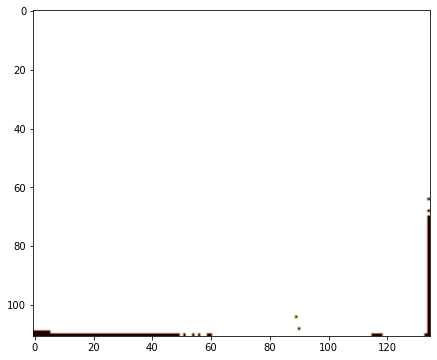

In [38]:
src = rasterio.open("../data/IL_BooneCo_2007.tif")
plt.figure(figsize=(10, 6))
plt.imshow(src.read(1), cmap='pink')
plt.show()

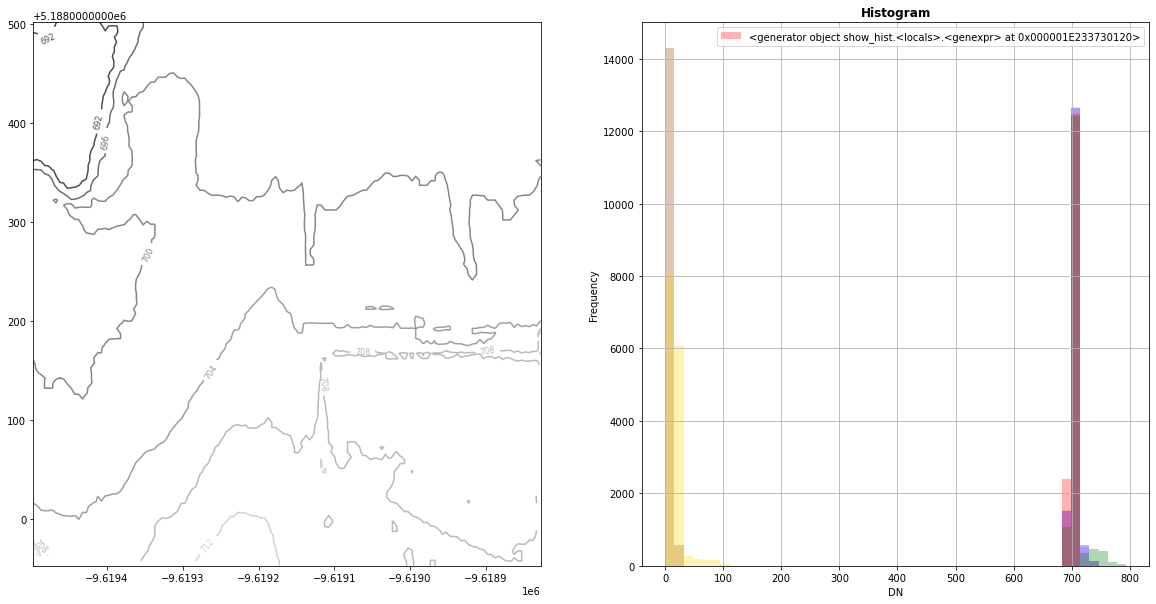

In [41]:
loaded_data.plot_2D()

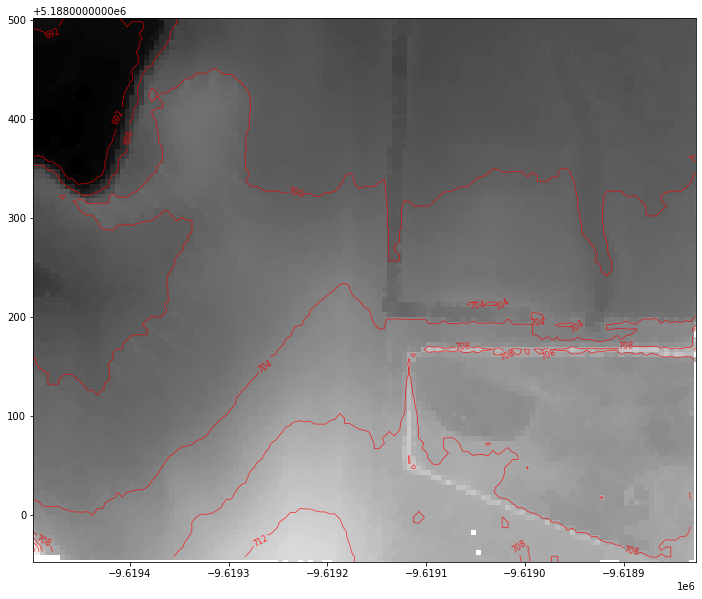

In [47]:
loaded_data.plot_dem_contours()

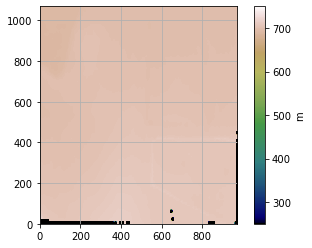

In [49]:
im = plt.imshow(src.read(1), cmap='gist_earth', vmin=250, vmax=750, extent=[0,972,0,1069])
cbar = plt.colorbar(im)
cbar.set_label('m')
plt.grid()

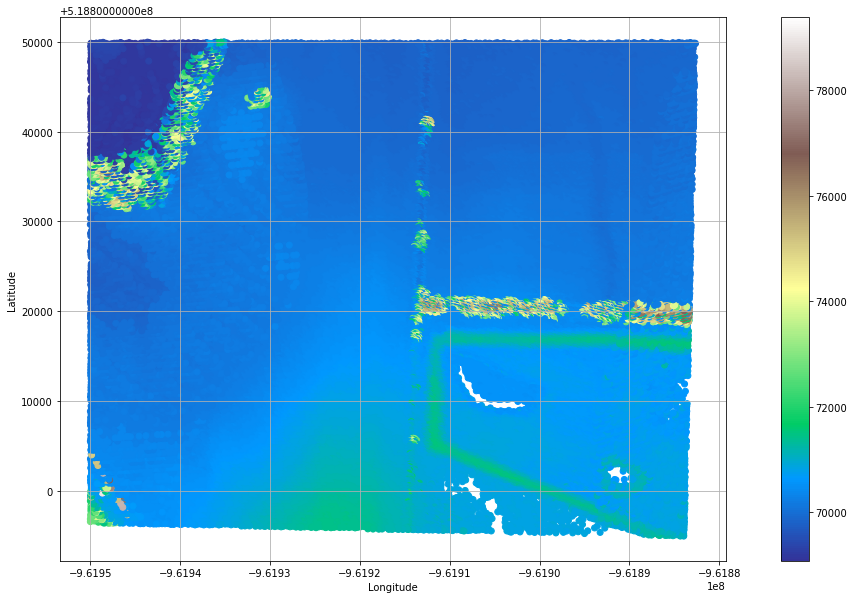

In [13]:
loaded_data.plot_heatmap(year="2007", data_dict=data_dict)

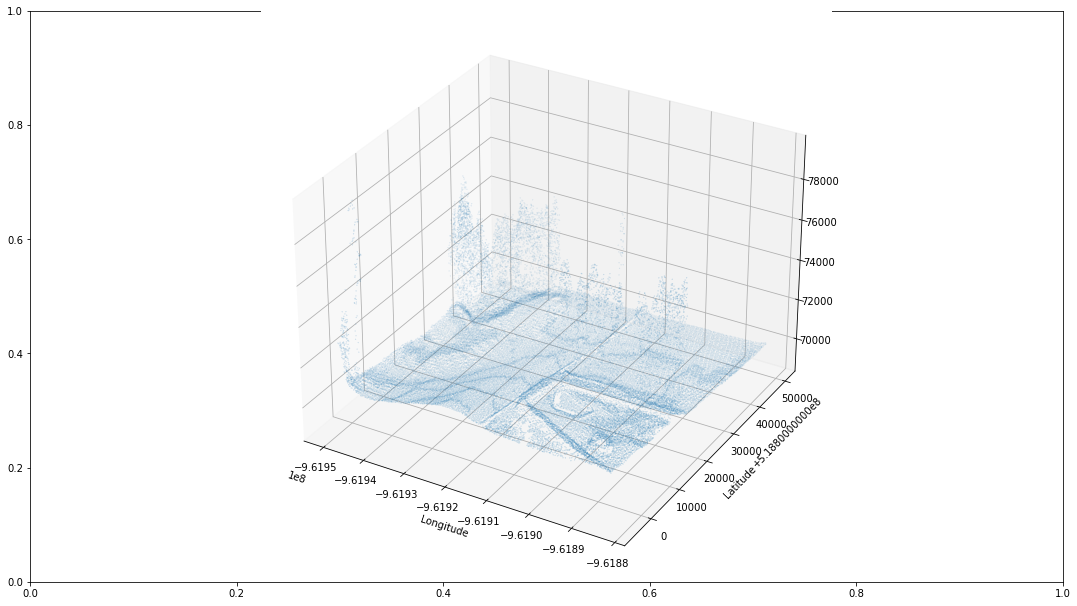

In [11]:
loaded_data.plot_3D(year="2007", data_dict=data_dict)